手工实现一个线性回归的训练过程
- 1）手工定义数据的生成   synthetic_data
- 2）手工定义数据迭代器   data_iter
- 3）手工定义线性回归函数  linreg
- 4）手工定义损失函数      squared_loss
- 5）手工定义随机梯度下降   sgd

最后使用标准的训练流程，完成线性回归的过程

In [2]:
%matplotlib inline
import random
import torch 


In [4]:
from d2l import torch as d2l


$$ loss=\frac{1}{n}\sum{(y_i)-\hat{y_i}} $$

$$ y = Xw+b+\epsilon $$

In [5]:
def synthetic_data(w,b,num_examples):
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features , labels = synthetic_data(true_w,true_b,1000)

In [6]:
print(features.shape,labels.shape)

torch.Size([1000, 2]) torch.Size([1000, 1])


In [8]:
print(features[0],labels[0])

tensor([-0.3763,  0.8557]) tensor([0.5439])


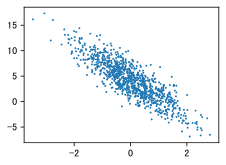

In [13]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)

In [12]:
print(features[:,0].shape)

torch.Size([1000])


In [17]:
zx = list(range(8))

In [19]:
zx = range(8)

In [20]:
print(zx
    )

range(0, 8)


In [16]:
def data_iter(batch_size,features,labels):
    num_exm = len(features)
    indices  = list(range(num_exm))
    random.shuffle(indices)
    for i in range(0,num_exm,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_exm)])
        yield features[batch_indices],labels[batch_indices]
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[ 0.5314, -0.4997],
        [ 0.6519,  1.0212],
        [ 0.3384,  1.6678],
        [ 1.1480, -0.7493],
        [ 1.3134,  0.8898],
        [ 0.2597,  0.7093],
        [ 0.0314,  1.9233],
        [ 0.8236, -0.9474],
        [ 0.2974, -0.3315],
        [-0.1756, -0.6589]]) 
 tensor([[ 6.9674],
        [ 2.0310],
        [-0.8009],
        [ 9.0340],
        [ 3.7973],
        [ 2.3123],
        [-2.2814],
        [ 9.0720],
        [ 5.9316],
        [ 6.0870]])


In [33]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [22]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [23]:
def squared_loss(y_hat,y):
    return(y_hat-y.reshape(y_hat.shape))**2/2

In [24]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()

In [34]:
lr = 0.03
epochs = 5
net = linreg
loss = squared_loss
for epoch in range(epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')

epoch1,loss0.045463
epoch2,loss0.000185
epoch3,loss0.000049
epoch4,loss0.000048
epoch5,loss0.000048


In [35]:
print(f'WuCha_w:{true_w - w.reshape(true_w.shape)}')
print(f'WuCha_b:{true_b - b}')


WuCha_w:tensor([-0.0004,  0.0003], grad_fn=<SubBackward0>)
WuCha_b:tensor([-0.0005], grad_fn=<RsubBackward1>)


In [51]:
zx = torch.normal(0,1,(3,1))

In [52]:
print(zx)

tensor([[0.3345],
        [0.6678],
        [0.2846]])
